# <center> Tuning Neural Networks

## <center> Optimizers

### SGD - Stochastic Gradient Descent
- Simplest optimizer
- Static learning rate


###  AdaGrad - Adaptive Gradients
- Different learning rate for each feature
- Learning rates tend to approach zero after a few batches

### RMSProp - Root Mean Square Propagation
- Similar to AdaGrad
- Less aggressively decreases learning rates

### Adam - Adaptive Moment Estimation
- Uses a history of gradients in addition to methods of RMSProp and AdaGrad
- Fast convergence, often the best choice

## <center>Learning Rate

- Larger learning rates train quickly but often failed to reach global minimums
- Smaller learning rates train slowly but more often succed at reaching global minimums
- Usually the default learning rate on an optimizer can work well
- Values between 0.0001 and 0.01 are most common (usually incremented in powers of 5 or 10)

## <center> Batch Size

- Batch size is the number of training samples utilized in one iteration
- Weights are updated after each batch
- Larger batch sizes take more time/resources to converge, can usally find global optima, but can lead to overfitting
- Smaller batch sizes are faster and can generalize well to unseen data, but can be noisy and get stuck in local optima
- Usually there is a sweet spot that avoids overfitting/underfitting
- 32 is a good starting place
- Try powers of 2 (8,16,32,64,128,256,512)

## <center> Noise

- Noise layers can be added to the input or between layers to help prevent overfitting and make the network more robust
- https://keras.io/layers/noise/
- https://analyticsindiamag.com/improving-deep-learning-model-robustness-by-adding-noise-using-keras/

## <center> Regularization

- L1 and L2 regularization (Lasso and Ridge) can be applied to the weights of any layer in Keras 
- This penalizes large weights and helps to prevent overfitting
- kernel_regularizer(applied to weights)
- bias_regularizer(applied to bias unit)
- activity_regularizer(applied to layer activation)
- https://keras.io/regularizers/

## <center> Dropout

- Dropout layers randomly ignore a fraction of the input neurons 
- Dropout stops the network from relying heavily on a single feature
- Helps to prevent overfitting

## <center> Early Stopping

- Early stopping can be used to prevent a network from over training

In [1]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Using TensorFlow backend.


Train on 30 samples, validate on 70 samples
Epoch 1/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.7010 - acc: 0.4667 - val_loss: 0.6891 - val_acc: 0.5571
Epoch 2/2000
30/30 [==============================] - 0s 118us/step - loss: 0.6839 - acc: 0.7333 - val_loss: 0.6781 - val_acc: 0.6857
Epoch 3/2000
30/30 [==============================] - 0s 113us/step - loss: 0.6674 - acc: 0.8333 - val_loss: 0.6674 - val_acc: 0.6857
Epoch 4/2000
30/30 [==============================] - 0s 130us/step - loss: 0.6512 - acc: 0.8333 - val_loss: 0.6571 - val_acc: 0.6857
Epoch 5/2000
30/30 [==============================] - 0s 116us/step - loss: 0.6355 - acc: 0.8667 - val_loss: 0.6471 - val_acc: 0.7000
Epoch 6/2000
30/30 [==============================] - 0s 108us/step - loss: 0.6203 - acc: 0.8667 - val_loss: 0.6376 - val_acc: 0.7143
Epoch 7/2000
30/30 [==============================] - 0s 115us/step - loss: 0.6055 - acc: 0.8667 - val_loss: 0.6283 - val_acc: 0.7143
Epoch 8/2000
30/30 [

Epoch 62/2000
30/30 [==============================] - 0s 117us/step - loss: 0.2334 - acc: 0.9000 - val_loss: 0.4519 - val_acc: 0.7429
Epoch 63/2000
30/30 [==============================] - 0s 101us/step - loss: 0.2314 - acc: 0.9000 - val_loss: 0.4512 - val_acc: 0.7429
Epoch 64/2000
30/30 [==============================] - 0s 118us/step - loss: 0.2295 - acc: 0.9000 - val_loss: 0.4506 - val_acc: 0.7429
Epoch 65/2000
30/30 [==============================] - 0s 193us/step - loss: 0.2276 - acc: 0.9000 - val_loss: 0.4499 - val_acc: 0.7429
Epoch 66/2000
30/30 [==============================] - 0s 113us/step - loss: 0.2258 - acc: 0.9000 - val_loss: 0.4492 - val_acc: 0.7429
Epoch 67/2000
30/30 [==============================] - 0s 127us/step - loss: 0.2241 - acc: 0.9000 - val_loss: 0.4486 - val_acc: 0.7429
Epoch 68/2000
30/30 [==============================] - 0s 137us/step - loss: 0.2225 - acc: 0.9000 - val_loss: 0.4479 - val_acc: 0.7429
Epoch 69/2000
30/30 [==============================] - 

Epoch 123/2000
30/30 [==============================] - 0s 152us/step - loss: 0.1746 - acc: 0.9333 - val_loss: 0.4100 - val_acc: 0.8000
Epoch 124/2000
30/30 [==============================] - 0s 167us/step - loss: 0.1741 - acc: 0.9333 - val_loss: 0.4092 - val_acc: 0.8000
Epoch 125/2000
30/30 [==============================] - 0s 151us/step - loss: 0.1736 - acc: 0.9333 - val_loss: 0.4084 - val_acc: 0.8000
Epoch 126/2000
30/30 [==============================] - 0s 131us/step - loss: 0.1731 - acc: 0.9333 - val_loss: 0.4076 - val_acc: 0.8000
Epoch 127/2000
30/30 [==============================] - 0s 148us/step - loss: 0.1725 - acc: 0.9333 - val_loss: 0.4068 - val_acc: 0.8000
Epoch 128/2000
30/30 [==============================] - 0s 186us/step - loss: 0.1720 - acc: 0.9333 - val_loss: 0.4060 - val_acc: 0.8143
Epoch 129/2000
30/30 [==============================] - 0s 139us/step - loss: 0.1715 - acc: 0.9333 - val_loss: 0.4052 - val_acc: 0.8143
Epoch 130/2000
30/30 [==========================

Epoch 184/2000
30/30 [==============================] - 0s 150us/step - loss: 0.1508 - acc: 0.9667 - val_loss: 0.3750 - val_acc: 0.8286
Epoch 185/2000
30/30 [==============================] - 0s 119us/step - loss: 0.1505 - acc: 0.9667 - val_loss: 0.3747 - val_acc: 0.8286
Epoch 186/2000
30/30 [==============================] - 0s 137us/step - loss: 0.1502 - acc: 0.9667 - val_loss: 0.3744 - val_acc: 0.8286
Epoch 187/2000
30/30 [==============================] - 0s 150us/step - loss: 0.1500 - acc: 0.9667 - val_loss: 0.3741 - val_acc: 0.8286
Epoch 188/2000
30/30 [==============================] - 0s 122us/step - loss: 0.1497 - acc: 0.9667 - val_loss: 0.3738 - val_acc: 0.8286
Epoch 189/2000
30/30 [==============================] - 0s 145us/step - loss: 0.1495 - acc: 0.9667 - val_loss: 0.3736 - val_acc: 0.8286
Epoch 190/2000
30/30 [==============================] - 0s 169us/step - loss: 0.1492 - acc: 0.9667 - val_loss: 0.3733 - val_acc: 0.8286
Epoch 191/2000
30/30 [==========================

Epoch 245/2000
30/30 [==============================] - 0s 116us/step - loss: 0.1404 - acc: 0.9667 - val_loss: 0.3712 - val_acc: 0.8143
Epoch 246/2000
30/30 [==============================] - 0s 124us/step - loss: 0.1403 - acc: 0.9667 - val_loss: 0.3712 - val_acc: 0.8143
Epoch 247/2000
30/30 [==============================] - 0s 120us/step - loss: 0.1402 - acc: 0.9667 - val_loss: 0.3712 - val_acc: 0.8143
Epoch 248/2000
30/30 [==============================] - 0s 231us/step - loss: 0.1401 - acc: 0.9667 - val_loss: 0.3713 - val_acc: 0.8143
Epoch 249/2000
30/30 [==============================] - 0s 141us/step - loss: 0.1400 - acc: 0.9667 - val_loss: 0.3713 - val_acc: 0.8143
Epoch 250/2000
30/30 [==============================] - 0s 114us/step - loss: 0.1399 - acc: 0.9667 - val_loss: 0.3713 - val_acc: 0.8143
Epoch 251/2000
30/30 [==============================] - 0s 156us/step - loss: 0.1398 - acc: 0.9667 - val_loss: 0.3714 - val_acc: 0.8143
Epoch 252/2000
30/30 [==========================

Epoch 306/2000
30/30 [==============================] - 0s 129us/step - loss: 0.1350 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 307/2000
30/30 [==============================] - 0s 122us/step - loss: 0.1349 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 308/2000
30/30 [==============================] - 0s 125us/step - loss: 0.1348 - acc: 0.9667 - val_loss: 0.3726 - val_acc: 0.8429
Epoch 309/2000
30/30 [==============================] - 0s 120us/step - loss: 0.1347 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 310/2000
30/30 [==============================] - 0s 131us/step - loss: 0.1346 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 311/2000
30/30 [==============================] - 0s 140us/step - loss: 0.1346 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 312/2000
30/30 [==============================] - 0s 104us/step - loss: 0.1345 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8429
Epoch 313/2000
30/30 [==========================

Epoch 367/2000
30/30 [==============================] - 0s 119us/step - loss: 0.1295 - acc: 0.9667 - val_loss: 0.3700 - val_acc: 0.8429
Epoch 368/2000
30/30 [==============================] - 0s 118us/step - loss: 0.1294 - acc: 0.9667 - val_loss: 0.3700 - val_acc: 0.8429
Epoch 369/2000
30/30 [==============================] - 0s 149us/step - loss: 0.1293 - acc: 0.9667 - val_loss: 0.3698 - val_acc: 0.8429
Epoch 370/2000
30/30 [==============================] - 0s 125us/step - loss: 0.1292 - acc: 0.9667 - val_loss: 0.3697 - val_acc: 0.8429
Epoch 371/2000
30/30 [==============================] - 0s 116us/step - loss: 0.1291 - acc: 0.9667 - val_loss: 0.3696 - val_acc: 0.8429
Epoch 372/2000
30/30 [==============================] - 0s 135us/step - loss: 0.1290 - acc: 0.9667 - val_loss: 0.3695 - val_acc: 0.8429
Epoch 373/2000
30/30 [==============================] - 0s 119us/step - loss: 0.1289 - acc: 0.9667 - val_loss: 0.3694 - val_acc: 0.8429
Epoch 374/2000
30/30 [==========================

Epoch 428/2000
30/30 [==============================] - 0s 151us/step - loss: 0.1220 - acc: 0.9667 - val_loss: 0.3595 - val_acc: 0.8429
Epoch 429/2000
30/30 [==============================] - 0s 126us/step - loss: 0.1219 - acc: 0.9667 - val_loss: 0.3592 - val_acc: 0.8429
Epoch 430/2000
30/30 [==============================] - 0s 106us/step - loss: 0.1217 - acc: 0.9667 - val_loss: 0.3589 - val_acc: 0.8429
Epoch 431/2000
30/30 [==============================] - 0s 155us/step - loss: 0.1216 - acc: 0.9667 - val_loss: 0.3586 - val_acc: 0.8429
Epoch 432/2000
30/30 [==============================] - 0s 126us/step - loss: 0.1214 - acc: 0.9667 - val_loss: 0.3583 - val_acc: 0.8429
Epoch 433/2000
30/30 [==============================] - 0s 112us/step - loss: 0.1213 - acc: 0.9667 - val_loss: 0.3580 - val_acc: 0.8429
Epoch 434/2000
30/30 [==============================] - 0s 141us/step - loss: 0.1211 - acc: 0.9667 - val_loss: 0.3577 - val_acc: 0.8429
Epoch 435/2000
30/30 [==========================

Epoch 489/2000
30/30 [==============================] - 0s 126us/step - loss: 0.1104 - acc: 0.9667 - val_loss: 0.3390 - val_acc: 0.8429
Epoch 490/2000
30/30 [==============================] - 0s 110us/step - loss: 0.1101 - acc: 0.9667 - val_loss: 0.3386 - val_acc: 0.8429
Epoch 491/2000
30/30 [==============================] - 0s 127us/step - loss: 0.1099 - acc: 0.9667 - val_loss: 0.3383 - val_acc: 0.8429
Epoch 492/2000
30/30 [==============================] - 0s 178us/step - loss: 0.1097 - acc: 0.9667 - val_loss: 0.3380 - val_acc: 0.8429
Epoch 493/2000
30/30 [==============================] - 0s 135us/step - loss: 0.1095 - acc: 0.9667 - val_loss: 0.3376 - val_acc: 0.8429
Epoch 494/2000
30/30 [==============================] - 0s 120us/step - loss: 0.1092 - acc: 0.9667 - val_loss: 0.3374 - val_acc: 0.8429
Epoch 495/2000
30/30 [==============================] - 0s 144us/step - loss: 0.1090 - acc: 0.9667 - val_loss: 0.3371 - val_acc: 0.8429
Epoch 496/2000
30/30 [==========================

Epoch 550/2000
30/30 [==============================] - 0s 139us/step - loss: 0.0963 - acc: 0.9667 - val_loss: 0.3162 - val_acc: 0.8429
Epoch 551/2000
30/30 [==============================] - 0s 181us/step - loss: 0.0960 - acc: 0.9667 - val_loss: 0.3157 - val_acc: 0.8429
Epoch 552/2000
30/30 [==============================] - 0s 163us/step - loss: 0.0958 - acc: 0.9667 - val_loss: 0.3151 - val_acc: 0.8429
Epoch 553/2000
30/30 [==============================] - 0s 145us/step - loss: 0.0955 - acc: 0.9667 - val_loss: 0.3146 - val_acc: 0.8429
Epoch 554/2000
30/30 [==============================] - 0s 204us/step - loss: 0.0953 - acc: 0.9667 - val_loss: 0.3142 - val_acc: 0.8429
Epoch 555/2000
30/30 [==============================] - 0s 172us/step - loss: 0.0951 - acc: 0.9667 - val_loss: 0.3137 - val_acc: 0.8429
Epoch 556/2000
30/30 [==============================] - 0s 161us/step - loss: 0.0948 - acc: 0.9667 - val_loss: 0.3134 - val_acc: 0.8429
Epoch 557/2000
30/30 [==========================

Epoch 611/2000
30/30 [==============================] - 0s 171us/step - loss: 0.0814 - acc: 0.9667 - val_loss: 0.2896 - val_acc: 0.8857
Epoch 612/2000
30/30 [==============================] - 0s 155us/step - loss: 0.0812 - acc: 0.9667 - val_loss: 0.2891 - val_acc: 0.8857
Epoch 613/2000
30/30 [==============================] - 0s 179us/step - loss: 0.0809 - acc: 0.9667 - val_loss: 0.2886 - val_acc: 0.8857
Epoch 614/2000
30/30 [==============================] - 0s 123us/step - loss: 0.0807 - acc: 0.9667 - val_loss: 0.2881 - val_acc: 0.8857
Epoch 615/2000
30/30 [==============================] - 0s 135us/step - loss: 0.0804 - acc: 0.9667 - val_loss: 0.2877 - val_acc: 0.8857
Epoch 616/2000
30/30 [==============================] - 0s 176us/step - loss: 0.0802 - acc: 0.9667 - val_loss: 0.2872 - val_acc: 0.8857
Epoch 617/2000
30/30 [==============================] - 0s 128us/step - loss: 0.0799 - acc: 0.9667 - val_loss: 0.2867 - val_acc: 0.8857
Epoch 618/2000
30/30 [==========================

Epoch 672/2000
30/30 [==============================] - 0s 127us/step - loss: 0.0665 - acc: 0.9667 - val_loss: 0.2671 - val_acc: 0.9143
Epoch 673/2000
30/30 [==============================] - 0s 155us/step - loss: 0.0663 - acc: 0.9667 - val_loss: 0.2668 - val_acc: 0.9143
Epoch 674/2000
30/30 [==============================] - 0s 163us/step - loss: 0.0660 - acc: 0.9667 - val_loss: 0.2665 - val_acc: 0.9143
Epoch 675/2000
30/30 [==============================] - 0s 157us/step - loss: 0.0658 - acc: 0.9667 - val_loss: 0.2661 - val_acc: 0.9143
Epoch 676/2000
30/30 [==============================] - 0s 171us/step - loss: 0.0656 - acc: 0.9667 - val_loss: 0.2658 - val_acc: 0.9143
Epoch 677/2000
30/30 [==============================] - 0s 130us/step - loss: 0.0653 - acc: 0.9667 - val_loss: 0.2655 - val_acc: 0.9143
Epoch 678/2000
30/30 [==============================] - 0s 184us/step - loss: 0.0651 - acc: 0.9667 - val_loss: 0.2652 - val_acc: 0.9143
Epoch 679/2000
30/30 [==========================

Epoch 733/2000
30/30 [==============================] - 0s 166us/step - loss: 0.0532 - acc: 0.9667 - val_loss: 0.2485 - val_acc: 0.9286
Epoch 734/2000
30/30 [==============================] - 0s 118us/step - loss: 0.0530 - acc: 0.9667 - val_loss: 0.2482 - val_acc: 0.9286
Epoch 735/2000
30/30 [==============================] - 0s 160us/step - loss: 0.0528 - acc: 0.9667 - val_loss: 0.2479 - val_acc: 0.9286
Epoch 736/2000
30/30 [==============================] - 0s 125us/step - loss: 0.0526 - acc: 0.9667 - val_loss: 0.2476 - val_acc: 0.9286
Epoch 737/2000
30/30 [==============================] - 0s 121us/step - loss: 0.0524 - acc: 0.9667 - val_loss: 0.2474 - val_acc: 0.9286
Epoch 738/2000
30/30 [==============================] - 0s 171us/step - loss: 0.0522 - acc: 0.9667 - val_loss: 0.2472 - val_acc: 0.9286
Epoch 739/2000
30/30 [==============================] - 0s 112us/step - loss: 0.0520 - acc: 0.9667 - val_loss: 0.2470 - val_acc: 0.9286
Epoch 740/2000
30/30 [==========================

Epoch 794/2000
30/30 [==============================] - 0s 151us/step - loss: 0.0417 - acc: 1.0000 - val_loss: 0.2378 - val_acc: 0.9286
Epoch 795/2000
30/30 [==============================] - 0s 167us/step - loss: 0.0416 - acc: 1.0000 - val_loss: 0.2377 - val_acc: 0.9286
Epoch 796/2000
30/30 [==============================] - 0s 157us/step - loss: 0.0414 - acc: 1.0000 - val_loss: 0.2376 - val_acc: 0.9286
Epoch 797/2000
30/30 [==============================] - 0s 224us/step - loss: 0.0412 - acc: 1.0000 - val_loss: 0.2375 - val_acc: 0.9286
Epoch 798/2000
30/30 [==============================] - 0s 146us/step - loss: 0.0411 - acc: 1.0000 - val_loss: 0.2375 - val_acc: 0.9286
Epoch 799/2000
30/30 [==============================] - 0s 172us/step - loss: 0.0409 - acc: 1.0000 - val_loss: 0.2374 - val_acc: 0.9286
Epoch 800/2000
30/30 [==============================] - 0s 280us/step - loss: 0.0407 - acc: 1.0000 - val_loss: 0.2373 - val_acc: 0.9286
Epoch 801/2000
30/30 [==========================

Epoch 855/2000
30/30 [==============================] - 0s 150us/step - loss: 0.0327 - acc: 1.0000 - val_loss: 0.2350 - val_acc: 0.9286
Epoch 856/2000
30/30 [==============================] - 0s 125us/step - loss: 0.0325 - acc: 1.0000 - val_loss: 0.2350 - val_acc: 0.9286
Epoch 857/2000
30/30 [==============================] - 0s 135us/step - loss: 0.0324 - acc: 1.0000 - val_loss: 0.2350 - val_acc: 0.9286
Epoch 858/2000
30/30 [==============================] - 0s 169us/step - loss: 0.0323 - acc: 1.0000 - val_loss: 0.2350 - val_acc: 0.9286
Epoch 859/2000
30/30 [==============================] - 0s 140us/step - loss: 0.0321 - acc: 1.0000 - val_loss: 0.2349 - val_acc: 0.9286
Epoch 860/2000
30/30 [==============================] - 0s 168us/step - loss: 0.0320 - acc: 1.0000 - val_loss: 0.2349 - val_acc: 0.9286
Epoch 861/2000
30/30 [==============================] - 0s 117us/step - loss: 0.0319 - acc: 1.0000 - val_loss: 0.2349 - val_acc: 0.9286
Epoch 862/2000
30/30 [==========================

Epoch 916/2000
30/30 [==============================] - 0s 141us/step - loss: 0.0257 - acc: 1.0000 - val_loss: 0.2370 - val_acc: 0.9429
Epoch 917/2000
30/30 [==============================] - 0s 150us/step - loss: 0.0256 - acc: 1.0000 - val_loss: 0.2371 - val_acc: 0.9429
Epoch 918/2000
30/30 [==============================] - 0s 147us/step - loss: 0.0255 - acc: 1.0000 - val_loss: 0.2371 - val_acc: 0.9429
Epoch 919/2000
30/30 [==============================] - 0s 131us/step - loss: 0.0254 - acc: 1.0000 - val_loss: 0.2372 - val_acc: 0.9429
Epoch 920/2000
30/30 [==============================] - 0s 114us/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.2373 - val_acc: 0.9429
Epoch 921/2000
30/30 [==============================] - 0s 120us/step - loss: 0.0252 - acc: 1.0000 - val_loss: 0.2373 - val_acc: 0.9429
Epoch 922/2000
30/30 [==============================] - 0s 160us/step - loss: 0.0251 - acc: 1.0000 - val_loss: 0.2374 - val_acc: 0.9429
Epoch 923/2000
30/30 [==========================

Epoch 977/2000
30/30 [==============================] - 0s 129us/step - loss: 0.0204 - acc: 1.0000 - val_loss: 0.2429 - val_acc: 0.9429
Epoch 978/2000
30/30 [==============================] - 0s 128us/step - loss: 0.0203 - acc: 1.0000 - val_loss: 0.2430 - val_acc: 0.9429
Epoch 979/2000
30/30 [==============================] - 0s 123us/step - loss: 0.0203 - acc: 1.0000 - val_loss: 0.2431 - val_acc: 0.9429
Epoch 980/2000
30/30 [==============================] - 0s 123us/step - loss: 0.0202 - acc: 1.0000 - val_loss: 0.2432 - val_acc: 0.9429
Epoch 981/2000
30/30 [==============================] - 0s 143us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.2434 - val_acc: 0.9429
Epoch 982/2000
30/30 [==============================] - 0s 188us/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.2435 - val_acc: 0.9429
Epoch 983/2000
30/30 [==============================] - 0s 154us/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.2436 - val_acc: 0.9429
Epoch 984/2000
30/30 [==========================

Epoch 1037/2000
30/30 [==============================] - 0s 116us/step - loss: 0.0164 - acc: 1.0000 - val_loss: 0.2509 - val_acc: 0.9429
Epoch 1038/2000
30/30 [==============================] - 0s 132us/step - loss: 0.0164 - acc: 1.0000 - val_loss: 0.2510 - val_acc: 0.9429
Epoch 1039/2000
30/30 [==============================] - 0s 164us/step - loss: 0.0163 - acc: 1.0000 - val_loss: 0.2512 - val_acc: 0.9429
Epoch 1040/2000
30/30 [==============================] - 0s 130us/step - loss: 0.0163 - acc: 1.0000 - val_loss: 0.2513 - val_acc: 0.9429
Epoch 1041/2000
30/30 [==============================] - 0s 118us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 0.2514 - val_acc: 0.9429
Epoch 1042/2000
30/30 [==============================] - 0s 164us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 0.2515 - val_acc: 0.9429
Epoch 1043/2000
30/30 [==============================] - 0s 158us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.2517 - val_acc: 0.9429
Epoch 1044/2000
30/30 [==================

Epoch 1097/2000
30/30 [==============================] - 0s 131us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.2606 - val_acc: 0.9429
Epoch 1098/2000
30/30 [==============================] - 0s 145us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.2608 - val_acc: 0.9429
Epoch 1099/2000
30/30 [==============================] - 0s 130us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.2610 - val_acc: 0.9429
Epoch 1100/2000
30/30 [==============================] - 0s 166us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.2612 - val_acc: 0.9429
Epoch 1101/2000
30/30 [==============================] - 0s 157us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.2614 - val_acc: 0.9429
Epoch 1102/2000
30/30 [==============================] - 0s 135us/step - loss: 0.0131 - acc: 1.0000 - val_loss: 0.2616 - val_acc: 0.9429
Epoch 1103/2000
30/30 [==============================] - 0s 172us/step - loss: 0.0131 - acc: 1.0000 - val_loss: 0.2618 - val_acc: 0.9429
Epoch 1104/2000
30/30 [==================

Epoch 1157/2000
30/30 [==============================] - 0s 194us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.2710 - val_acc: 0.9429
Epoch 1158/2000
30/30 [==============================] - 0s 155us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.2711 - val_acc: 0.9429
Epoch 1159/2000
30/30 [==============================] - 0s 141us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.2713 - val_acc: 0.9429
Epoch 1160/2000
30/30 [==============================] - 0s 196us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2714 - val_acc: 0.9429
Epoch 1161/2000
30/30 [==============================] - 0s 128us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2715 - val_acc: 0.9429
Epoch 1162/2000
30/30 [==============================] - 0s 119us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2717 - val_acc: 0.9429
Epoch 1163/2000
30/30 [==============================] - 0s 184us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.2718 - val_acc: 0.9429
Epoch 1164/2000
30/30 [==================

Epoch 1217/2000
30/30 [==============================] - 0s 127us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.2799 - val_acc: 0.9429
Epoch 1218/2000
30/30 [==============================] - 0s 205us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9429
Epoch 1219/2000
30/30 [==============================] - 0s 144us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.2802 - val_acc: 0.9429
Epoch 1220/2000
30/30 [==============================] - 0s 125us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.2804 - val_acc: 0.9429
Epoch 1221/2000
30/30 [==============================] - 0s 153us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.2805 - val_acc: 0.9429
Epoch 1222/2000
30/30 [==============================] - 0s 161us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.2807 - val_acc: 0.9429
Epoch 1223/2000
30/30 [==============================] - 0s 130us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.2808 - val_acc: 0.9429
Epoch 1224/2000
30/30 [==================

Epoch 1277/2000
30/30 [==============================] - 0s 190us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2882 - val_acc: 0.9286
Epoch 1278/2000
30/30 [==============================] - 0s 137us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2883 - val_acc: 0.9286
Epoch 1279/2000
30/30 [==============================] - 0s 138us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2884 - val_acc: 0.9286
Epoch 1280/2000
30/30 [==============================] - 0s 216us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2886 - val_acc: 0.9286
Epoch 1281/2000
30/30 [==============================] - 0s 162us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2887 - val_acc: 0.9286
Epoch 1282/2000
30/30 [==============================] - 0s 169us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.2888 - val_acc: 0.9286
Epoch 1283/2000
30/30 [==============================] - 0s 165us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.2890 - val_acc: 0.9286
Epoch 1284/2000
30/30 [==================

Epoch 1337/2000
30/30 [==============================] - 0s 118us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2955 - val_acc: 0.9286
Epoch 1338/2000
30/30 [==============================] - 0s 125us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2956 - val_acc: 0.9286
Epoch 1339/2000
30/30 [==============================] - 0s 159us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2957 - val_acc: 0.9286
Epoch 1340/2000
30/30 [==============================] - 0s 209us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2959 - val_acc: 0.9286
Epoch 1341/2000
30/30 [==============================] - 0s 139us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2960 - val_acc: 0.9286
Epoch 1342/2000
30/30 [==============================] - 0s 202us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2961 - val_acc: 0.9286
Epoch 1343/2000
30/30 [==============================] - 0s 143us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2962 - val_acc: 0.9286
Epoch 1344/2000
30/30 [==================

Epoch 1397/2000
30/30 [==============================] - 0s 102us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.9286
Epoch 1398/2000
30/30 [==============================] - 0s 141us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.3030 - val_acc: 0.9286
Epoch 1399/2000
30/30 [==============================] - 0s 127us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.3031 - val_acc: 0.9286
Epoch 1400/2000
30/30 [==============================] - 0s 164us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.3032 - val_acc: 0.9286
Epoch 1401/2000
30/30 [==============================] - 0s 155us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3033 - val_acc: 0.9286
Epoch 1402/2000
30/30 [==============================] - 0s 138us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.9286
Epoch 1403/2000
30/30 [==============================] - 0s 186us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.9286
Epoch 1404/2000
30/30 [==================

Epoch 1457/2000
30/30 [==============================] - 0s 131us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.3099 - val_acc: 0.9286
Epoch 1458/2000
30/30 [==============================] - 0s 159us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3101 - val_acc: 0.9286
Epoch 1459/2000
30/30 [==============================] - 0s 162us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3102 - val_acc: 0.9286
Epoch 1460/2000
30/30 [==============================] - 0s 141us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3103 - val_acc: 0.9286
Epoch 1461/2000
30/30 [==============================] - 0s 140us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 0.9286
Epoch 1462/2000
30/30 [==============================] - 0s 156us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3105 - val_acc: 0.9286
Epoch 1463/2000
30/30 [==============================] - 0s 138us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3107 - val_acc: 0.9286
Epoch 1464/2000
30/30 [==================

Epoch 1517/2000
30/30 [==============================] - 0s 182us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3171 - val_acc: 0.9286
Epoch 1518/2000
30/30 [==============================] - 0s 152us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3172 - val_acc: 0.9286
Epoch 1519/2000
30/30 [==============================] - 0s 165us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3173 - val_acc: 0.9286
Epoch 1520/2000
30/30 [==============================] - 0s 144us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3174 - val_acc: 0.9286
Epoch 1521/2000
30/30 [==============================] - 0s 124us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3176 - val_acc: 0.9286
Epoch 1522/2000
30/30 [==============================] - 0s 128us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3177 - val_acc: 0.9286
Epoch 1523/2000
30/30 [==============================] - 0s 147us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3178 - val_acc: 0.9286
Epoch 1524/2000
30/30 [==================

Epoch 1577/2000
30/30 [==============================] - 0s 127us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3240 - val_acc: 0.9286
Epoch 1578/2000
30/30 [==============================] - 0s 162us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3241 - val_acc: 0.9286
Epoch 1579/2000
30/30 [==============================] - 0s 144us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3242 - val_acc: 0.9286
Epoch 1580/2000
30/30 [==============================] - 0s 132us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3243 - val_acc: 0.9286
Epoch 1581/2000
30/30 [==============================] - 0s 148us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3245 - val_acc: 0.9286
Epoch 1582/2000
30/30 [==============================] - 0s 148us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3246 - val_acc: 0.9286
Epoch 1583/2000
30/30 [==============================] - 0s 145us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9286
Epoch 1584/2000
30/30 [==================

Epoch 1637/2000
30/30 [==============================] - 0s 152us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3306 - val_acc: 0.9286
Epoch 1638/2000
30/30 [==============================] - 0s 108us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3307 - val_acc: 0.9286
Epoch 1639/2000
30/30 [==============================] - 0s 149us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3309 - val_acc: 0.9286
Epoch 1640/2000
30/30 [==============================] - 0s 143us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3310 - val_acc: 0.9286
Epoch 1641/2000
30/30 [==============================] - 0s 159us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3311 - val_acc: 0.9286
Epoch 1642/2000
30/30 [==============================] - 0s 138us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3312 - val_acc: 0.9286
Epoch 1643/2000
30/30 [==============================] - 0s 137us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3313 - val_acc: 0.9286
Epoch 1644/2000
30/30 [==================

Epoch 1697/2000
30/30 [==============================] - 0s 148us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3373 - val_acc: 0.9286
Epoch 1698/2000
30/30 [==============================] - 0s 132us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3374 - val_acc: 0.9286
Epoch 1699/2000
30/30 [==============================] - 0s 146us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3375 - val_acc: 0.9286
Epoch 1700/2000
30/30 [==============================] - 0s 138us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3376 - val_acc: 0.9286
Epoch 1701/2000
30/30 [==============================] - 0s 145us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3377 - val_acc: 0.9286
Epoch 1702/2000
30/30 [==============================] - 0s 146us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3378 - val_acc: 0.9286
Epoch 1703/2000
30/30 [==============================] - 0s 144us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3379 - val_acc: 0.9286
Epoch 1704/2000
30/30 [==================

Epoch 1757/2000
30/30 [==============================] - 0s 141us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3436 - val_acc: 0.9286
Epoch 1758/2000
30/30 [==============================] - 0s 154us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.9286
Epoch 1759/2000
30/30 [==============================] - 0s 150us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3438 - val_acc: 0.9286
Epoch 1760/2000
30/30 [==============================] - 0s 187us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3439 - val_acc: 0.9286
Epoch 1761/2000
30/30 [==============================] - 0s 162us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3440 - val_acc: 0.9286
Epoch 1762/2000
30/30 [==============================] - 0s 167us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3441 - val_acc: 0.9286
Epoch 1763/2000
30/30 [==============================] - 0s 159us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3442 - val_acc: 0.9286
Epoch 1764/2000
30/30 [==================

Epoch 1817/2000
30/30 [==============================] - 0s 172us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3496 - val_acc: 0.9286
Epoch 1818/2000
30/30 [==============================] - 0s 180us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3497 - val_acc: 0.9286
Epoch 1819/2000
30/30 [==============================] - 0s 170us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3498 - val_acc: 0.9286
Epoch 1820/2000
30/30 [==============================] - 0s 163us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3499 - val_acc: 0.9286
Epoch 1821/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3500 - val_acc: 0.9286
Epoch 1822/2000
30/30 [==============================] - 0s 176us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3501 - val_acc: 0.9286
Epoch 1823/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3502 - val_acc: 0.9286
Epoch 1824/2000
30/30 [==================

Epoch 1877/2000
30/30 [==============================] - 0s 160us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3553 - val_acc: 0.9286
Epoch 1878/2000
30/30 [==============================] - 0s 117us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3554 - val_acc: 0.9286
Epoch 1879/2000
30/30 [==============================] - 0s 170us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3555 - val_acc: 0.9286
Epoch 1880/2000
30/30 [==============================] - 0s 162us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3556 - val_acc: 0.9286
Epoch 1881/2000
30/30 [==============================] - 0s 124us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3557 - val_acc: 0.9286
Epoch 1882/2000
30/30 [==============================] - 0s 133us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3558 - val_acc: 0.9286
Epoch 1883/2000
30/30 [==============================] - 0s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3559 - val_acc: 0.9286
Epoch 1884/2000
30/30 [==================

Epoch 1937/2000
30/30 [==============================] - 0s 195us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3608 - val_acc: 0.9286
Epoch 1938/2000
30/30 [==============================] - 0s 113us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3609 - val_acc: 0.9286
Epoch 1939/2000
30/30 [==============================] - 0s 137us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3610 - val_acc: 0.9286
Epoch 1940/2000
30/30 [==============================] - 0s 180us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3611 - val_acc: 0.9286
Epoch 1941/2000
30/30 [==============================] - 0s 171us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3612 - val_acc: 0.9286
Epoch 1942/2000
30/30 [==============================] - 0s 139us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3612 - val_acc: 0.9286
Epoch 1943/2000
30/30 [==============================] - 0s 239us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3613 - val_acc: 0.9286
Epoch 1944/2000
30/30 [==================

Epoch 1997/2000
30/30 [==============================] - 0s 161us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3661 - val_acc: 0.9286
Epoch 1998/2000
30/30 [==============================] - 0s 175us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3662 - val_acc: 0.9286
Epoch 1999/2000
30/30 [==============================] - 0s 153us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3663 - val_acc: 0.9286
Epoch 2000/2000
30/30 [==============================] - 0s 115us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3664 - val_acc: 0.9286
Train: 1.000, Test: 0.929


<Figure size 640x480 with 1 Axes>

Train on 30 samples, validate on 70 samples
Epoch 1/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.6841 - acc: 0.5333 - val_loss: 0.6797 - val_acc: 0.4857
Epoch 2/2000
30/30 [==============================] - 0s 132us/step - loss: 0.6718 - acc: 0.5333 - val_loss: 0.6690 - val_acc: 0.5857
Epoch 3/2000
30/30 [==============================] - 0s 112us/step - loss: 0.6556 - acc: 0.8333 - val_loss: 0.6597 - val_acc: 0.6571
Epoch 4/2000
30/30 [==============================] - 0s 129us/step - loss: 0.6414 - acc: 0.8333 - val_loss: 0.6498 - val_acc: 0.6857
Epoch 5/2000
30/30 [==============================] - 0s 124us/step - loss: 0.6261 - acc: 0.8333 - val_loss: 0.6403 - val_acc: 0.6857
Epoch 6/2000
30/30 [==============================] - 0s 145us/step - loss: 0.6113 - acc: 0.8333 - val_loss: 0.6312 - val_acc: 0.6857
Epoch 7/2000
30/30 [==============================] - 0s 121us/step - loss: 0.5970 - acc: 0.8667 - val_loss: 0.6226 - val_acc: 0.7000
Epoch 8/2000
30/30 [

Epoch 62/2000
30/30 [==============================] - 0s 149us/step - loss: 0.2315 - acc: 0.9000 - val_loss: 0.4450 - val_acc: 0.7429
Epoch 63/2000
30/30 [==============================] - 0s 209us/step - loss: 0.2295 - acc: 0.9000 - val_loss: 0.4443 - val_acc: 0.7429
Epoch 64/2000
30/30 [==============================] - 0s 122us/step - loss: 0.2275 - acc: 0.9000 - val_loss: 0.4438 - val_acc: 0.7429
Epoch 65/2000
30/30 [==============================] - 0s 122us/step - loss: 0.2256 - acc: 0.9000 - val_loss: 0.4432 - val_acc: 0.7429
Epoch 66/2000
30/30 [==============================] - 0s 224us/step - loss: 0.2238 - acc: 0.9000 - val_loss: 0.4426 - val_acc: 0.7429
Epoch 67/2000
30/30 [==============================] - 0s 144us/step - loss: 0.2220 - acc: 0.9000 - val_loss: 0.4421 - val_acc: 0.7429
Epoch 68/2000
30/30 [==============================] - 0s 157us/step - loss: 0.2204 - acc: 0.9000 - val_loss: 0.4415 - val_acc: 0.7429
Epoch 69/2000
30/30 [==============================] - 

Epoch 123/2000
30/30 [==============================] - 0s 126us/step - loss: 0.1731 - acc: 0.9333 - val_loss: 0.4081 - val_acc: 0.8000
Epoch 124/2000
30/30 [==============================] - 0s 134us/step - loss: 0.1726 - acc: 0.9333 - val_loss: 0.4074 - val_acc: 0.8143
Epoch 125/2000
30/30 [==============================] - 0s 151us/step - loss: 0.1721 - acc: 0.9333 - val_loss: 0.4067 - val_acc: 0.8143
Epoch 126/2000
30/30 [==============================] - 0s 127us/step - loss: 0.1716 - acc: 0.9333 - val_loss: 0.4059 - val_acc: 0.8143
Epoch 127/2000
30/30 [==============================] - 0s 139us/step - loss: 0.1711 - acc: 0.9333 - val_loss: 0.4052 - val_acc: 0.8143
Epoch 128/2000
30/30 [==============================] - 0s 126us/step - loss: 0.1706 - acc: 0.9333 - val_loss: 0.4045 - val_acc: 0.8143
Epoch 129/2000
30/30 [==============================] - 0s 184us/step - loss: 0.1701 - acc: 0.9333 - val_loss: 0.4038 - val_acc: 0.8143
Epoch 130/2000
30/30 [==========================

Epoch 184/2000
30/30 [==============================] - 0s 128us/step - loss: 0.1494 - acc: 0.9667 - val_loss: 0.3737 - val_acc: 0.8286
Epoch 185/2000
30/30 [==============================] - 0s 134us/step - loss: 0.1492 - acc: 0.9667 - val_loss: 0.3734 - val_acc: 0.8286
Epoch 186/2000
30/30 [==============================] - 0s 170us/step - loss: 0.1489 - acc: 0.9667 - val_loss: 0.3731 - val_acc: 0.8286
Epoch 187/2000
30/30 [==============================] - 0s 174us/step - loss: 0.1486 - acc: 0.9667 - val_loss: 0.3727 - val_acc: 0.8286
Epoch 188/2000
30/30 [==============================] - 0s 115us/step - loss: 0.1484 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8286
Epoch 189/2000
30/30 [==============================] - 0s 149us/step - loss: 0.1481 - acc: 0.9667 - val_loss: 0.3722 - val_acc: 0.8286
Epoch 190/2000
30/30 [==============================] - 0s 113us/step - loss: 0.1479 - acc: 0.9667 - val_loss: 0.3719 - val_acc: 0.8286
Epoch 191/2000
30/30 [==========================

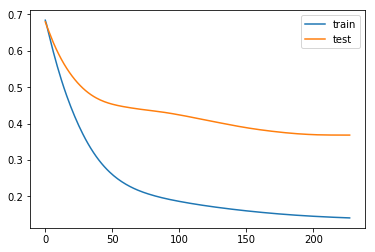

In [2]:
from keras.callbacks import EarlyStopping
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## <center> Saving and Loading Neural Networks

### <center> Model Structure and Weights Seperately

In [5]:
## saving model 
model_json = model.to_json() 
with open("model.json", "w") as json_file:
    json_file.write(model_json)
## saving weights
model.save_weights("model.h5")

In [6]:
from keras.models import model_from_json
## loading model 
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## loading weights
loaded_model.load_weights("model.h5")
## compile model
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### <center> Model Structure and Weights Together

In [7]:
model.save('whole_model.h5')

In [8]:
from keras.models import load_model
loaded_model = load_model('whole_model.h5')
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## <center> Activity

<center> Train a neural network using the dataset generated below. Use the tuning techniques mentioned above to improve its performance.

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification(n_classes=5, n_features=1000, n_informative=950, class_sep=0.90, n_samples=10000, random_state=4)

In [20]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [24]:
model = Sequential()
model.add(Dense(750, input_dim=1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=500, verbose=1)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 7500 samples, validate on 2500 samples
Epoch 1/500
7500/7500 [==============================] - 2s 268us/step - loss: 1.7999 - acc: 0.2057 - val_loss: 1.6221 - val_acc: 0.1924
Epoch 2/500
7500/7500 [==============================] - 1s 198us/step - loss: 1.6106 - acc: 0.1975 - val_loss: 1.6097 - val_acc: 0.2072
Epoch 3/500
7500/7500 [==============================] - 2s 201us/step - loss: 1.6093 - acc: 0.2039 - val_loss: 1.6107 - val_acc: 0.1888
Epoch 4/500
7500/7500 [==============================] - 1s 193us/step - loss: 1.6113 - acc: 0.2088 - val_loss: 1.6099 - val_acc: 0.1940
Epoch 5/500
7500/7500 [==============================] - 1s 183us/step - loss: 1.5971 - acc: 0.2205 - val_loss: 1.5957 - val_acc: 0.2460
Epoch 6/500
7500/7500 [==============================] - 1s 189us/step - loss: 1.5521 - acc: 0.2677 - val_loss: 1.6000 - val_acc: 0.2092
Epoch 7/500
7500/7500 [==============================] - 1s 195us/step - loss: 1.4907 - acc: 0.3037 - val_loss: 1.5449 - val_acc: 

7500/7500 [==============================] - 2s 230us/step - loss: 0.0320 - acc: 0.9945 - val_loss: 2.3421 - val_acc: 0.6004
Epoch 61/500
7500/7500 [==============================] - 2s 249us/step - loss: 0.0142 - acc: 0.9969 - val_loss: 2.8288 - val_acc: 0.6116
Epoch 62/500
7500/7500 [==============================] - 2s 270us/step - loss: 0.0467 - acc: 0.9896 - val_loss: 2.5318 - val_acc: 0.5984
Epoch 63/500
7500/7500 [==============================] - 2s 236us/step - loss: 0.0525 - acc: 0.9884 - val_loss: 2.1620 - val_acc: 0.6148
Epoch 64/500
7500/7500 [==============================] - 2s 243us/step - loss: 0.0310 - acc: 0.9932 - val_loss: 2.2219 - val_acc: 0.6044
Epoch 65/500
7500/7500 [==============================] - 2s 283us/step - loss: 0.0153 - acc: 0.9980 - val_loss: 2.4622 - val_acc: 0.6004
Epoch 66/500
7500/7500 [==============================] - 2s 305us/step - loss: 0.0170 - acc: 0.9973 - val_loss: 2.7422 - val_acc: 0.6048
Epoch 67/500
7500/7500 [=======================

KeyboardInterrupt: 

In [37]:
from keras import regularizers
from keras.layers import GaussianNoise
from keras.layers import Dropout

In [42]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=500, verbose=1)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 7500 samples, validate on 2500 samples
Epoch 1/500
7500/7500 [==============================] - 1s 193us/step - loss: 4.3444 - acc: 0.2221 - val_loss: 1.8505 - val_acc: 0.2276
Epoch 2/500
7500/7500 [==============================] - 0s 50us/step - loss: 1.5164 - acc: 0.3445 - val_loss: 1.8159 - val_acc: 0.2320
Epoch 3/500
7500/7500 [==============================] - 0s 50us/step - loss: 1.2569 - acc: 0.4491 - val_loss: 1.8934 - val_acc: 0.2488
Epoch 4/500
7500/7500 [==============================] - 0s 50us/step - loss: 1.0717 - acc: 0.5311 - val_loss: 1.9470 - val_acc: 0.2620
Epoch 5/500
7500/7500 [==============================] - 0s 56us/step - loss: 0.9059 - acc: 0.6116 - val_loss: 2.0964 - val_acc: 0.2912
Epoch 6/500
7500/7500 [==============================] - 0s 57us/step - loss: 0.7618 - acc: 0.6784 - val_loss: 2.2004 - val_acc: 0.2924
Epoch 7/500
7500/7500 [==============================] - 0s 52us/step - loss: 0.6464 - acc: 0.7321 - val_loss: 2.3615 - val_acc: 0.3100

Epoch 120/500
7500/7500 [==============================] - 0s 50us/step - loss: 0.1818 - acc: 0.9560 - val_loss: 4.8791 - val_acc: 0.4112
Epoch 121/500
7500/7500 [==============================] - 0s 49us/step - loss: 0.6019 - acc: 0.8345 - val_loss: 3.3434 - val_acc: 0.4156
Epoch 122/500
7500/7500 [==============================] - 0s 48us/step - loss: 0.1863 - acc: 0.9372 - val_loss: 3.6727 - val_acc: 0.4228
Epoch 123/500
7500/7500 [==============================] - 0s 47us/step - loss: 0.0530 - acc: 0.9851 - val_loss: 3.9754 - val_acc: 0.4188
Epoch 124/500
7500/7500 [==============================] - 0s 48us/step - loss: 0.0193 - acc: 0.9963 - val_loss: 4.1617 - val_acc: 0.4384
Epoch 125/500
7500/7500 [==============================] - 0s 48us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 4.2708 - val_acc: 0.4368
Epoch 126/500
7500/7500 [==============================] - 0s 47us/step - loss: 0.0076 - acc: 0.9991 - val_loss: 4.4024 - val_acc: 0.4428
Epoch 127/500
7500/7500 [=========

Epoch 237/500
7500/7500 [==============================] - 0s 58us/step - loss: 9.1966e-06 - acc: 1.0000 - val_loss: 5.7368 - val_acc: 0.4552
Epoch 238/500
7500/7500 [==============================] - 0s 58us/step - loss: 8.6402e-06 - acc: 1.0000 - val_loss: 5.7500 - val_acc: 0.4552
Epoch 239/500
7500/7500 [==============================] - 0s 56us/step - loss: 8.0227e-06 - acc: 1.0000 - val_loss: 5.7617 - val_acc: 0.4556
Epoch 240/500
7500/7500 [==============================] - 0s 60us/step - loss: 7.5033e-06 - acc: 1.0000 - val_loss: 5.7726 - val_acc: 0.4540
Epoch 241/500
7500/7500 [==============================] - 0s 63us/step - loss: 7.1250e-06 - acc: 1.0000 - val_loss: 5.7823 - val_acc: 0.4552
Epoch 242/500
7500/7500 [==============================] - 0s 63us/step - loss: 6.6148e-06 - acc: 1.0000 - val_loss: 5.7930 - val_acc: 0.4556
Epoch 243/500
7500/7500 [==============================] - 0s 60us/step - loss: 6.2062e-06 - acc: 1.0000 - val_loss: 5.8061 - val_acc: 0.4556
Epoch 

Epoch 352/500
7500/7500 [==============================] - 0s 53us/step - loss: 1.2011e-07 - acc: 1.0000 - val_loss: 6.5592 - val_acc: 0.4560
Epoch 353/500
7500/7500 [==============================] - 0s 52us/step - loss: 1.1996e-07 - acc: 1.0000 - val_loss: 6.5626 - val_acc: 0.4560
Epoch 354/500
7500/7500 [==============================] - 0s 53us/step - loss: 1.1988e-07 - acc: 1.0000 - val_loss: 6.5652 - val_acc: 0.4564
Epoch 355/500
7500/7500 [==============================] - 0s 51us/step - loss: 1.1982e-07 - acc: 1.0000 - val_loss: 6.5664 - val_acc: 0.4564
Epoch 356/500
7500/7500 [==============================] - 0s 51us/step - loss: 1.1974e-07 - acc: 1.0000 - val_loss: 6.5692 - val_acc: 0.4560
Epoch 357/500
7500/7500 [==============================] - 0s 50us/step - loss: 1.1967e-07 - acc: 1.0000 - val_loss: 6.5713 - val_acc: 0.4560
Epoch 358/500
7500/7500 [==============================] - 0s 51us/step - loss: 1.1965e-07 - acc: 1.0000 - val_loss: 6.5738 - val_acc: 0.4560
Epoch 

Epoch 467/500
7500/7500 [==============================] - 0s 48us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 468/500
7500/7500 [==============================] - 0s 49us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 469/500
7500/7500 [==============================] - 0s 48us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 470/500
7500/7500 [==============================] - 0s 48us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 471/500
7500/7500 [==============================] - 0s 49us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 472/500
7500/7500 [==============================] - 0s 49us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 473/500
7500/7500 [==============================] - 0s 48us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.6334 - val_acc: 0.4528
Epoch 

In [41]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(1000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=500, verbose=1)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 7500 samples, validate on 2500 samples
Epoch 1/500
7500/7500 [==============================] - 1s 192us/step - loss: 3.8153 - acc: 0.2020 - val_loss: 1.6843 - val_acc: 0.1988
Epoch 2/500
7500/7500 [==============================] - 0s 57us/step - loss: 1.6230 - acc: 0.2073 - val_loss: 1.6453 - val_acc: 0.1996
Epoch 3/500
7500/7500 [==============================] - 0s 66us/step - loss: 1.6095 - acc: 0.2100 - val_loss: 1.6409 - val_acc: 0.1992
Epoch 4/500
7500/7500 [==============================] - 0s 59us/step - loss: 1.6060 - acc: 0.2131 - val_loss: 1.6318 - val_acc: 0.1996
Epoch 5/500
7500/7500 [==============================] - 1s 68us/step - loss: 1.6010 - acc: 0.2148 - val_loss: 1.6329 - val_acc: 0.1972
Epoch 6/500
7500/7500 [==============================] - 0s 59us/step - loss: 1.5946 - acc: 0.2187 - val_loss: 1.6346 - val_acc: 0.1996
Epoch 7/500
7500/7500 [==============================] - 0s 65us/step - loss: 1.5837 - acc: 0.2268 - val_loss: 1.6580 - val_acc: 0.2060

Epoch 120/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0654 - acc: 0.9791 - val_loss: 1.7548 - val_acc: 0.6028
Epoch 121/500
7500/7500 [==============================] - 0s 66us/step - loss: 0.0542 - acc: 0.9792 - val_loss: 1.7279 - val_acc: 0.6176
Epoch 122/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0448 - acc: 0.9852 - val_loss: 1.7888 - val_acc: 0.6076
Epoch 123/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0548 - acc: 0.9799 - val_loss: 1.7322 - val_acc: 0.6188
Epoch 124/500
7500/7500 [==============================] - 0s 64us/step - loss: 0.0542 - acc: 0.9819 - val_loss: 1.7562 - val_acc: 0.6068
Epoch 125/500
7500/7500 [==============================] - 1s 70us/step - loss: 0.0524 - acc: 0.9815 - val_loss: 1.8284 - val_acc: 0.6072
Epoch 126/500
7500/7500 [==============================] - 1s 70us/step - loss: 0.0673 - acc: 0.9776 - val_loss: 1.7851 - val_acc: 0.6000
Epoch 127/500
7500/7500 [=========

7500/7500 [==============================] - 1s 67us/step - loss: 0.0295 - acc: 0.9903 - val_loss: 1.6274 - val_acc: 0.6436
Epoch 239/500
7500/7500 [==============================] - 1s 70us/step - loss: 0.0290 - acc: 0.9904 - val_loss: 1.5888 - val_acc: 0.6500
Epoch 240/500
7500/7500 [==============================] - 0s 58us/step - loss: 0.0288 - acc: 0.9905 - val_loss: 1.6226 - val_acc: 0.6612
Epoch 241/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0220 - acc: 0.9931 - val_loss: 1.6491 - val_acc: 0.6552
Epoch 242/500
7500/7500 [==============================] - 0s 66us/step - loss: 0.0281 - acc: 0.9904 - val_loss: 1.6229 - val_acc: 0.6536
Epoch 243/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0315 - acc: 0.9889 - val_loss: 1.6230 - val_acc: 0.6444
Epoch 244/500
7500/7500 [==============================] - 0s 60us/step - loss: 0.0292 - acc: 0.9895 - val_loss: 1.6720 - val_acc: 0.6432
Epoch 245/500
7500/7500 [=======================

7500/7500 [==============================] - 0s 63us/step - loss: 0.0167 - acc: 0.9944 - val_loss: 1.5486 - val_acc: 0.6604
Epoch 357/500
7500/7500 [==============================] - 0s 60us/step - loss: 0.0294 - acc: 0.9913 - val_loss: 1.4992 - val_acc: 0.6616
Epoch 358/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0217 - acc: 0.9927 - val_loss: 1.5326 - val_acc: 0.6632
Epoch 359/500
7500/7500 [==============================] - 0s 58us/step - loss: 0.0259 - acc: 0.9920 - val_loss: 1.5948 - val_acc: 0.6596
Epoch 360/500
7500/7500 [==============================] - 0s 58us/step - loss: 0.0267 - acc: 0.9913 - val_loss: 1.5083 - val_acc: 0.6652
Epoch 361/500
7500/7500 [==============================] - 0s 55us/step - loss: 0.0242 - acc: 0.9912 - val_loss: 1.5171 - val_acc: 0.6600
Epoch 362/500
7500/7500 [==============================] - 0s 55us/step - loss: 0.0236 - acc: 0.9935 - val_loss: 1.5370 - val_acc: 0.6600
Epoch 363/500
7500/7500 [=======================

7500/7500 [==============================] - 0s 67us/step - loss: 0.0215 - acc: 0.9935 - val_loss: 1.4190 - val_acc: 0.6656
Epoch 475/500
7500/7500 [==============================] - 0s 66us/step - loss: 0.0193 - acc: 0.9940 - val_loss: 1.4956 - val_acc: 0.6572
Epoch 476/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0179 - acc: 0.9933 - val_loss: 1.4796 - val_acc: 0.6704
Epoch 477/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0224 - acc: 0.9943 - val_loss: 1.4672 - val_acc: 0.6648
Epoch 478/500
7500/7500 [==============================] - 0s 61us/step - loss: 0.0208 - acc: 0.9932 - val_loss: 1.5354 - val_acc: 0.6592
Epoch 479/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0243 - acc: 0.9927 - val_loss: 1.4821 - val_acc: 0.6684
Epoch 480/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0133 - acc: 0.9964 - val_loss: 1.5278 - val_acc: 0.6668
Epoch 481/500
7500/7500 [=======================

In [43]:
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=500, verbose=1)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 7500 samples, validate on 2500 samples
Epoch 1/500
7500/7500 [==============================] - 2s 215us/step - loss: 6.1285 - acc: 0.2244 - val_loss: 2.5360 - val_acc: 0.2260
Epoch 2/500
7500/7500 [==============================] - 0s 64us/step - loss: 1.9668 - acc: 0.2608 - val_loss: 1.8005 - val_acc: 0.2236
Epoch 3/500
7500/7500 [==============================] - 0s 66us/step - loss: 1.6330 - acc: 0.2800 - val_loss: 1.7091 - val_acc: 0.2324
Epoch 4/500
7500/7500 [==============================] - 0s 61us/step - loss: 1.5563 - acc: 0.2973 - val_loss: 1.6795 - val_acc: 0.2320
Epoch 5/500
7500/7500 [==============================] - 0s 61us/step - loss: 1.5022 - acc: 0.3301 - val_loss: 1.6846 - val_acc: 0.2432
Epoch 6/500
7500/7500 [==============================] - 0s 65us/step - loss: 1.4639 - acc: 0.3551 - val_loss: 1.6923 - val_acc: 0.2596
Epoch 7/500
7500/7500 [==============================] - 1s 68us/step - loss: 1.4153 - acc: 0.3856 - val_loss: 1.6852 - val_acc: 0.2736

Epoch 120/500
7500/7500 [==============================] - 1s 70us/step - loss: 0.0640 - acc: 0.9783 - val_loss: 1.8286 - val_acc: 0.5816
Epoch 121/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0703 - acc: 0.9751 - val_loss: 1.7853 - val_acc: 0.5752
Epoch 122/500
7500/7500 [==============================] - 0s 59us/step - loss: 0.0824 - acc: 0.9723 - val_loss: 1.7367 - val_acc: 0.5896
Epoch 123/500
7500/7500 [==============================] - 0s 60us/step - loss: 0.0805 - acc: 0.9743 - val_loss: 1.7191 - val_acc: 0.5872
Epoch 124/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0762 - acc: 0.9729 - val_loss: 1.7480 - val_acc: 0.5948
Epoch 125/500
7500/7500 [==============================] - 0s 64us/step - loss: 0.0826 - acc: 0.9732 - val_loss: 1.6893 - val_acc: 0.5948
Epoch 126/500
7500/7500 [==============================] - 0s 65us/step - loss: 0.0668 - acc: 0.9779 - val_loss: 1.7064 - val_acc: 0.5912
Epoch 127/500
7500/7500 [=========

7500/7500 [==============================] - 0s 58us/step - loss: 0.0364 - acc: 0.9868 - val_loss: 1.7158 - val_acc: 0.6128
Epoch 239/500
7500/7500 [==============================] - 0s 60us/step - loss: 0.0369 - acc: 0.9871 - val_loss: 1.7069 - val_acc: 0.6244
Epoch 240/500
7500/7500 [==============================] - 0s 61us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 1.7177 - val_acc: 0.6140
Epoch 241/500
7500/7500 [==============================] - 1s 73us/step - loss: 0.0435 - acc: 0.9847 - val_loss: 1.6401 - val_acc: 0.6160
Epoch 242/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0394 - acc: 0.9864 - val_loss: 1.6562 - val_acc: 0.6160
Epoch 243/500
7500/7500 [==============================] - 0s 66us/step - loss: 0.0362 - acc: 0.9887 - val_loss: 1.6819 - val_acc: 0.6108
Epoch 244/500
7500/7500 [==============================] - 0s 57us/step - loss: 0.0386 - acc: 0.9868 - val_loss: 1.7133 - val_acc: 0.6132
Epoch 245/500
7500/7500 [=======================

7500/7500 [==============================] - 1s 73us/step - loss: 0.0332 - acc: 0.9887 - val_loss: 1.6257 - val_acc: 0.6372
Epoch 357/500
7500/7500 [==============================] - 0s 64us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 1.5911 - val_acc: 0.6412
Epoch 358/500
7500/7500 [==============================] - 1s 68us/step - loss: 0.0226 - acc: 0.9932 - val_loss: 1.6338 - val_acc: 0.6332
Epoch 359/500
7500/7500 [==============================] - 0s 62us/step - loss: 0.0293 - acc: 0.9900 - val_loss: 1.6208 - val_acc: 0.6352
Epoch 360/500
7500/7500 [==============================] - 0s 64us/step - loss: 0.0291 - acc: 0.9908 - val_loss: 1.5894 - val_acc: 0.6456
Epoch 361/500
7500/7500 [==============================] - 0s 63us/step - loss: 0.0248 - acc: 0.9916 - val_loss: 1.5866 - val_acc: 0.6424
Epoch 362/500
7500/7500 [==============================] - 0s 65us/step - loss: 0.0239 - acc: 0.9932 - val_loss: 1.6464 - val_acc: 0.6328
Epoch 363/500
7500/7500 [=======================

7500/7500 [==============================] - 1s 79us/step - loss: 0.0234 - acc: 0.9917 - val_loss: 1.6040 - val_acc: 0.6480
Epoch 475/500
7500/7500 [==============================] - 1s 81us/step - loss: 0.0262 - acc: 0.9904 - val_loss: 1.5928 - val_acc: 0.6452
Epoch 476/500
7500/7500 [==============================] - 1s 78us/step - loss: 0.0218 - acc: 0.9920 - val_loss: 1.5691 - val_acc: 0.6504
Epoch 477/500
7500/7500 [==============================] - 0s 66us/step - loss: 0.0237 - acc: 0.9925 - val_loss: 1.5788 - val_acc: 0.6448
Epoch 478/500
7500/7500 [==============================] - 1s 69us/step - loss: 0.0201 - acc: 0.9940 - val_loss: 1.5858 - val_acc: 0.6536
Epoch 479/500
7500/7500 [==============================] - 1s 72us/step - loss: 0.0220 - acc: 0.9929 - val_loss: 1.6026 - val_acc: 0.6480
Epoch 480/500
7500/7500 [==============================] - 1s 69us/step - loss: 0.0251 - acc: 0.9925 - val_loss: 1.5692 - val_acc: 0.6500
Epoch 481/500
7500/7500 [=======================

## <center> Homework

<center> Fit a neural network to your Mod 5 project dataset.